In [32]:
import sys
from pathlib import Path

module_path = str(Path.cwd().parents[0])

if module_path not in sys.path:
    sys.path.append(module_path)

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv('../data/processed/HotelReservationsLabelP.csv')
df.head(1)

,label_avg_price_per_room,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,no_total_people,no_total_nights,season_group
0,1,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,0,2,3,Autumn


In [34]:
from scripts import data_preprocess

# Definir a coluna alvo
target_column = 'label_avg_price_per_room'

# Pré-processamento dos dados
preprocessor, X, y = data_preprocess.preprocess(df, target_column)

# Exibir o pré-processador
preprocessor

ColumnTransformer(transformers=[('num', 'passthrough',
                                 Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'no_of_special_requests', 'no_total_people', 'no_total_nights'],
      dtype='object')),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'season_group'],
      dtype='object'))])

In [35]:
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,no_total_people,no_total_nights,season_group
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,0,2,3,Autumn
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,1,2,5,Autumn
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,0,1,3,Winter
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,0,2,2,Spring
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,0,2,2,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,1,3,8,Summer
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,2,2,4,Autumn
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,2,2,8,Summer
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,0,2,3,Spring


In [36]:
y

0        1
1        2
2        1
3        2
4        2
        ..
36270    3
36271    2
36272    2
36273    2
36274    3
Name: label_avg_price_per_room, Length: 36275, dtype: int64

In [37]:
X_prep = preprocessor.fit_transform(X)
X_prep

array([[2., 0., 1., ..., 0., 0., 0.],
       [2., 0., 2., ..., 0., 0., 0.],
       [1., 0., 2., ..., 0., 0., 1.],
       ...,
       [2., 0., 2., ..., 0., 1., 0.],
       [2., 0., 0., ..., 1., 0., 0.],
       [2., 0., 1., ..., 0., 0., 1.]])

In [38]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

feature_names = list(numeric_features) + list(categorical_feature_names)
X_df = pd.DataFrame(X_prep, columns=feature_names)
X_df


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,season_group_Autumn,season_group_Spring,season_group_Summer,season_group_Winter
0,2.0,0.0,1.0,2.0,0.0,224.0,2017.0,10.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2.0,0.0,2.0,3.0,0.0,5.0,2018.0,11.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1.0,0.0,2.0,1.0,0.0,1.0,2018.0,2.0,28.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2.0,0.0,0.0,2.0,0.0,211.0,2018.0,5.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2.0,0.0,1.0,1.0,0.0,48.0,2018.0,4.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3.0,0.0,2.0,6.0,0.0,85.0,2018.0,8.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
36271,2.0,0.0,1.0,3.0,0.0,228.0,2018.0,10.0,17.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
36272,2.0,0.0,2.0,6.0,0.0,148.0,2018.0,7.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
36273,2.0,0.0,0.0,3.0,0.0,63.0,2018.0,4.0,21.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [39]:
from sklearn.model_selection import train_test_split
from scripts import data_oversampler

X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

X_resampled, y_resampled = data_oversampler.oversample(X_train, y_train)

# Certificar que o número de amostras seja consistente
assert X_resampled.shape[0] == y_resampled.shape[0], "Inconsistência no número de amostras após reamostragem"

In [40]:
y_resampled

0        3
1        3
2        1
3        1
4        3
        ..
32662    3
32663    3
32664    3
32665    3
32666    3
Name: label_avg_price_per_room, Length: 32667, dtype: int64

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_resampled)

KNeighborsClassifier()

KNN Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.81      0.79      2187
           2       0.73      0.70      0.71      2711
           3       0.80      0.79      0.80      2357

    accuracy                           0.76      7255
   macro avg       0.76      0.77      0.77      7255
weighted avg       0.76      0.76      0.76      7255

KNN Accuracy:  0.763473466574776


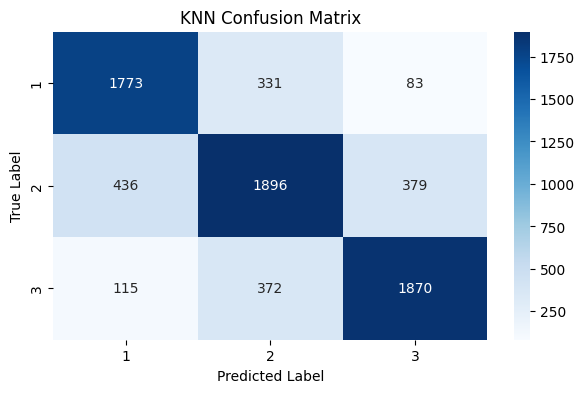

In [42]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = knn.predict(X_test_scaled)

print("KNN Classification Report:")
print(classification_report(y_test, y_pred))

print("KNN Accuracy: ", accuracy_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('KNN Confusion Matrix')
plt.show()


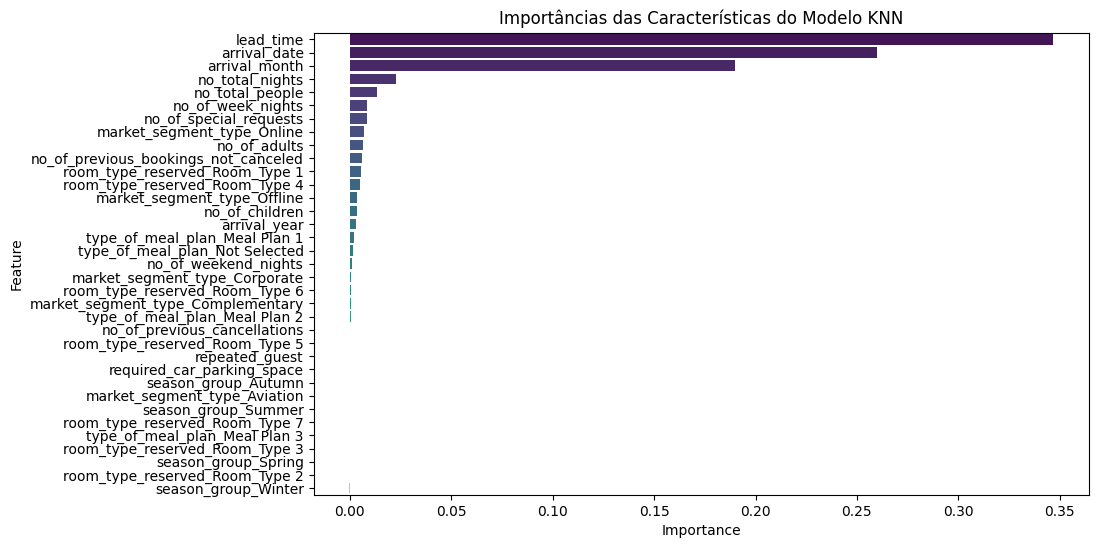

In [31]:

from sklearn.inspection import permutation_importance

# Calcula a importância da permutação
perm_importance = permutation_importance(knn, X_train, y_train, n_repeats=3, random_state=42)

# Cria um DataFrame para as importâncias das características
knn_feat_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': perm_importance.importances_mean
})

# Ordena o DataFrame pela importância
knn_feat_importances = knn_feat_importances.sort_values(by='Importance', ascending=False)

# Plota as importâncias das características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=knn_feat_importances, palette='viridis')
plt.title('Importâncias das Características do Modelo KNN')
plt.show()


In [43]:
from sklearn.model_selection import GridSearchCV

# Inicializa o KNN
knn = KNeighborsClassifier()

# Define a grade de parâmetros com opções válidas para o KNN
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Cria o GridSearchCV com o modelo KNN e a grade de parâmetros
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Treina o GridSearchCV com os dados reamostrados
grid_search.fit(X_resampled, y_resampled)

# Imprime os melhores parâmetros encontrados
print(grid_search.best_params_)

# Obtém o melhor modelo treinado
best_model = grid_search.best_estimator_

# Faz previsões com o melhor modelo
y_pred_best = best_model.predict(X_test)

# Imprime a matriz de confusão e o relatório de classificação
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

# Imprime a acurácia
print("Accuracy: ", accuracy_score(y_test, y_pred_best))

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
[[1724  347  116]
 [ 330 2091  290]
 [ 103  379 1875]]
              precision    recall  f1-score   support

           1       0.80      0.79      0.79      2187
           2       0.74      0.77      0.76      2711
           3       0.82      0.80      0.81      2357

    accuracy                           0.78      7255
   macro avg       0.79      0.79      0.79      7255
weighted avg       0.79      0.78      0.78      7255

Accuracy:  0.7842866988283942
